In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import cv2
import glob

In [41]:
data_path = "/Users/rohanwaghmare/Desktop/Project/TBX11K/imgs"
all_folders = os.listdir(data_path)
all_folders

['sick', '.DS_Store', 'test', 'health', 'tb']

In [42]:
healthy_dir=r'/Users/rohanwaghmare/Desktop/Project/TBX11K/imgs/health'
sick_dir=r'/Users/rohanwaghmare/Desktop/Project/TBX11K/imgs/sick'
tb_dir=r'/Users/rohanwaghmare/Desktop/Project/TBX11K/imgs/tb'
filepaths=[]
labels=[]  
for category, klass in zip([healthy_dir, sick_dir, tb_dir], ['health', 'sick', 'tb']): 
    flist=os.listdir(category)    
    for f in flist:
        fpath=os.path.join(category,f)        
        filepaths.append(fpath)
        labels.append(klass)    
Fseries= pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries, Lseries], axis=1)
print (df.head())
print('df length: ', len(df))
balance=df['labels'].value_counts()
print (balance)

                                           filepaths  labels
0  /Users/rohanwaghmare/Desktop/Project/TBX11K/im...  health
1  /Users/rohanwaghmare/Desktop/Project/TBX11K/im...  health
2  /Users/rohanwaghmare/Desktop/Project/TBX11K/im...  health
3  /Users/rohanwaghmare/Desktop/Project/TBX11K/im...  health
4  /Users/rohanwaghmare/Desktop/Project/TBX11K/im...  health
df length:  8400
health    3800
sick      3800
tb         800
Name: labels, dtype: int64


In [43]:
file_count = 800
samples = []
for category in df['labels'].unique():    
    category_slice = df.query("labels == @category")
    samples.append(category_slice.sample(file_count, replace=False,random_state=1))
df = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
print (df['labels'].value_counts())
print (len(df))

sick      800
health    800
tb        800
Name: labels, dtype: int64
2400


def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.equalizeHist(image)
    image = cv2.resize(image, (224, 224))
    image = image.astype("float32") / 255.0
    return image

df['preprocessed_images'] = df['filepaths'].apply(preprocess_image)


In [44]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Storing original image for visualization
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Create a CLAHE object with specified clipLimit and tileGridSize
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    
    # Apply CLAHE to the image
    image = clahe.apply(image)
    
    image = cv2.resize(image, (224, 224))
    image = cv2.merge((image,)*3)
    image = image.astype("float32") / 255.0
    return original_image,image

df['preprocessed_images'] = df['filepaths'].apply(preprocess_image)



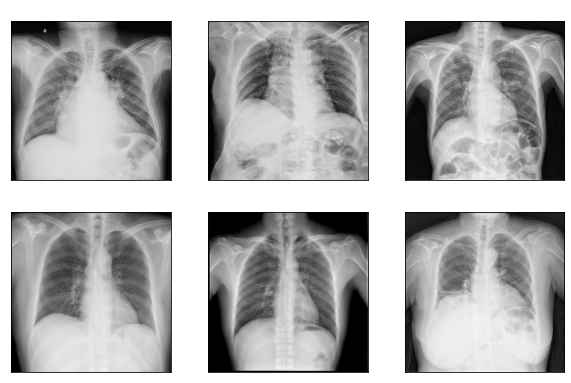

In [45]:
plt.figure(figsize=(10,10))
for i in range(6):
    random = np.random.randint(1,len(df))
    plt.subplot(3,3,i+1)
    img = df.loc[random,'filepaths']
    plt.imshow(plt.imread(img))
    plt.title(df.loc[random, "labels"], size = 10, color = "white") 
    plt.xticks([])
    plt.yticks([])

In [46]:
print(df.head(5))

                                           filepaths  labels  \
0  /Users/rohanwaghmare/Desktop/Project/TBX11K/im...    sick   
1  /Users/rohanwaghmare/Desktop/Project/TBX11K/im...  health   
2  /Users/rohanwaghmare/Desktop/Project/TBX11K/im...    sick   
3  /Users/rohanwaghmare/Desktop/Project/TBX11K/im...      tb   
4  /Users/rohanwaghmare/Desktop/Project/TBX11K/im...    sick   

                                 preprocessed_images  
0  ([[[19 19 19], [19 19 19], [19 19 19], [18 18 ...  
1  ([[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]...  
2  ([[[10 10 10], [9 9 9], [8 8 8], [8 8 8], [8 8...  
3  ([[[3 3 3], [3 3 3], [2 2 2], [2 2 2], [2 2 2]...  
4  ([[[9 9 9], [9 9 9], [9 9 9], [8 8 8], [8 8 8]...  


In [47]:
def preprocess_image2(image_path):
    image2 = cv2.imread(image_path, cv2.IMREAD_COLOR)
    original_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB) # Storing original image for visualization
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    
    # Create a CLAHE object with specified clipLimit and tileGridSize
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    
    # Apply CLAHE to the image
    image2 = clahe.apply(image2)
    

    
    image2 = cv2.resize(image2, (224, 224))
    image2 = cv2.merge((image2,)*3)
    image2 = image2.astype("float32") / 255.0
    return original_image2,image2

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(df['preprocessed_images'][i], cmap='gray')
    ax.set_title(df['labels'][i])
    ax.axis('off')
plt.show()

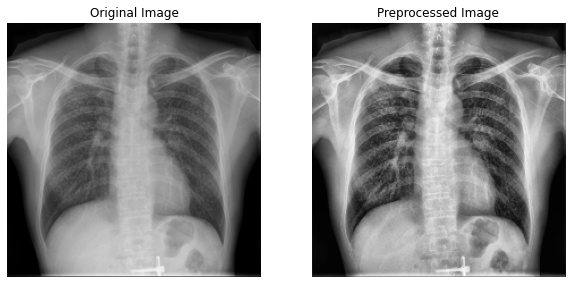

In [48]:
# Choose a TB labelled image from the dataset
image_path = df.loc[3, 'filepaths']

# Preprocess the image
original_image, preprocessed_image = preprocess_image(image_path)

# Visualize the original and preprocessed images side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(preprocessed_image, cmap='gray')
axes[1].set_title('Preprocessed Image')
axes[1].axis('off')
plt.show()

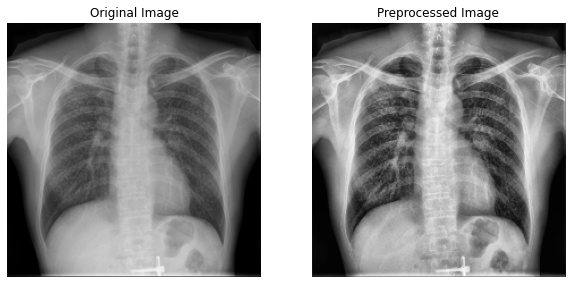

In [49]:
# Choose a TB labelled image from the dataset
image_path = df.loc[3, 'filepaths']

# Preprocess the image
original_image2, preprocessed_image2 = preprocess_image2(image_path)

# Visualize the original and preprocessed images side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].imshow(original_image2)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(preprocessed_image2, cmap='gray')
axes[1].set_title('Preprocessed Image')
axes[1].axis('off')
plt.show()

In [51]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, train_size=0.95, random_state=0)
train_df, valid_df = train_test_split(train_df, train_size=0.9, random_state=0)
print(train_df.labels.value_counts())
print(valid_df.labels.value_counts())
print(test_df.labels.value_counts())

tb        685
sick      684
health    683
Name: labels, dtype: int64
sick      79
health    79
tb        70
Name: labels, dtype: int64
tb        45
health    38
sick      37
Name: labels, dtype: int64


In [ ]:
target_size=(224,224)
batch_size=16
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, horizontal_flip=True)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input)
train_gen = train_datagen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')
valid_gen = test_datagen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')
test_gen = test_datagen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical')

Found 2052 validated image filenames belonging to 3 classes.
Found 228 validated image filenames belonging to 3 classes.
Found 120 validated image filenames belonging to 3 classes.


In [90]:
base_model = tf.keras.applications.EfficientNetB3(include_top=False, input_shape=(224,224,3), weights='imagenet')
classify_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(3, activation='softmax')
])

In [94]:
classify_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               196736    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 3

In [ ]:
from tensorflow.keras.optimizers import Adam
lr=0.001
classify_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=lr), metrics=['accuracy'])
patience = 2
stop_patience = 5
factor = 0.5

callbacks = [ 
    tf.keras.callbacks.ModelCheckpoint("classify_model.h5", monitor='val_loss', save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1)
]
epochs = 30
history = classify_model.fit(train_gen, validation_data=valid_gen, epochs=epochs, callbacks=callbacks, verbose=1)

/Users/rohanwaghmare/miniforge3/envs/mlp/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30


2023-05-11 23:49:44.843852: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


129/129 [==============================] - 615s 5s/step - loss: 0.3769 - accuracy: 0.8757 - val_loss: 0.2770 - val_accuracy: 0.8772 - lr: 0.0010
Epoch 2/30
129/129 [==============================] - 592s 5s/step - loss: 0.1766 - accuracy: 0.9430 - val_loss: 0.2213 - val_accuracy: 0.9518 - lr: 0.0010
Epoch 3/30
129/129 [==============================] - 626s 5s/step - loss: 0.1246 - accuracy: 0.9571 - val_loss: 0.1155 - val_accuracy: 0.9649 - lr: 0.0010
Epoch 4/30
129/129 [==============================] - 672s 5s/step - loss: 0.0670 - accuracy: 0.9800 - val_loss: 0.1646 - val_accuracy: 0.9781 - lr: 0.0010
Epoch 5/30
129/129 [==============================] - ETA: 0s - loss: 0.1044 - accuracy: 0.9644
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
129/129 [==============================] - 576s 4s/step - loss: 0.1044 - accuracy: 0.9644 - val_loss: 6.8284 - val_accuracy: 0.7237 - lr: 0.0010
Epoch 6/30
129/129 [==============================] - 531s 4s/step - l

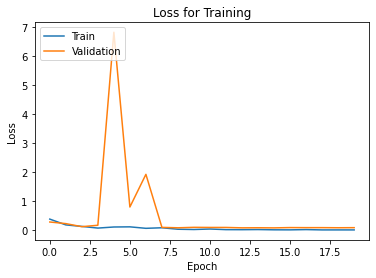

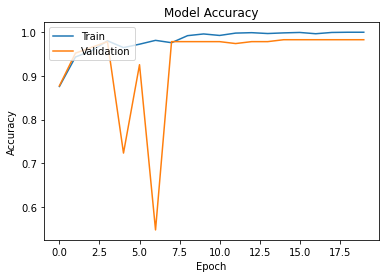

In [ ]:
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc="upper left")
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:

classify_model.save('./classify_model_claheb3.h5')

In [ ]:
best_model.evaluate(test_gen)

8/8 [==============================] - 6s 691ms/step - loss: 0.0274 - accuracy: 0.9917


[0.0274294875562191, 0.9916666746139526]

In [ ]:
model=load

In [ ]:
base_model.summary()

Model: "efficientnetb3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                     

TB


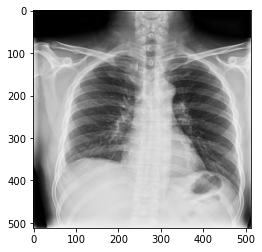

In [ ]:
# Load the image and preprocess it
img_path = '/Users/rohanwaghmare/Desktop/Project/TBX11K/imgs/test/unknown_14.png'
oimg,img = preprocess_image2(img_path)
img = np.expand_dims(img, axis=0)
# Load the model and GradCAM object
model = tf.keras.models.load_model('./classify_model_claheb3.h5')
class_labels = ['Healthy', 'Sick', 'TB']

# Get the index of the class with the highest predicted probability
pred_class = np.argmax(preds)

# Get the corresponding class label
label = class_labels[pred_class]

# Print the predicted class label
print(label)
plt.imshow(cv2.imread(img_path))

In [17]:
def preprocess_image2(image_path):
    image2 = cv2.imread(image_path, cv2.IMREAD_COLOR)
    original_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB) # Storing original image for visualization
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    
    # Create a CLAHE object with specified clipLimit and tileGridSize
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    
    # Apply CLAHE to the image
    image2 = clahe.apply(image2)
    

    
    image2 = cv2.resize(image2, (224, 224))
    image2 = cv2.merge((image2,)*3)
    image2 = image2.astype("float32") / 255.0
    return original_image2,image2

In [18]:
import cv2
import numpy as np
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('./classify_model_claheb3.h5')

# Define the class labels
class_labels = ['Healthy', 'Sick', 'TB']

# Set the image path, class index, and layer name
img_path = '/Users/rohanwaghmare/Desktop/Project/TBX11K/imgs/test/unknown_14.png'

layer_name = 'dense_3'
# Display the image and CAM
oimg,kimg = preprocess_image2(img_path)
img=np.expand_dims(kimg, axis=0)

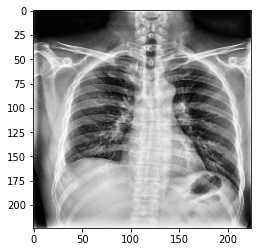

In [19]:
plt.imshow(kimg)

In [20]:
base_model=model.layers[0]

In [21]:
base_model.summary()

Model: "efficientnetb3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                     

In [73]:
last_conv_layer_name = 'top_conv'
classifier_layer_names = ['global_average_pooling2d','dense_2','batch_normalization','dropout','dense_3']
img_path='/Users/rohanwaghmare/Desktop/Project/TBX11K/imgs/test/unknown_50.png'
class_index=3
# Load the image and preprocess it
oimg,kimg=preprocess_image2(img_path)
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.keras.applications.efficientnet.preprocess_input(img)


In [74]:

# Get the gradient model and output predictions
grad_model = tf.keras.models.Model([base_model.inputs], [base_model.get_layer(last_conv_layer_name).output, base_model.output])
with tf.GradientTape() as tape:
    conv_output, predictions = grad_model(tf.expand_dims(img, axis=0))
    loss = predictions[:, class_index]

# Get the gradients and compute weights
grads = tape.gradient(loss, conv_output)[0]
weights = np.mean(grads, axis=(0, 1))

# Get the output feature map of the last convolutional layer
conv_output = conv_output.numpy()[0]

# Compute the weighted sum of the output feature map
cam = np.dot(conv_output, weights)

# Resize the CAM to be the same size as the input image
cam = cv2.resize(cam, (224, 224))

# Normalize the CAM values between 0 and 1
cam = cam - np.min(cam)
cam = cam / np.max(cam)

# Apply the jet colormap to the CAM
jet_cam = plt.get_cmap('jet')(cam)

# Convert the jet colormap to RGB
jet_cam = np.array(jet_cam)
jet_cam = jet_cam[:, :, :3]
jet_cam = tf.keras.preprocessing.image.img_to_array(jet_cam)

In [75]:
# Overlay the CAM on the original image
heatmap = cv2.applyColorMap(np.uint8(255*jet_cam), cv2.COLORMAP_JET)
overlayed_img = cv2.addWeighted(cv2.cvtColor(np.uint8(255*img), cv2.COLOR_RGB2BGR), 0.7, heatmap, 0.3, 0)

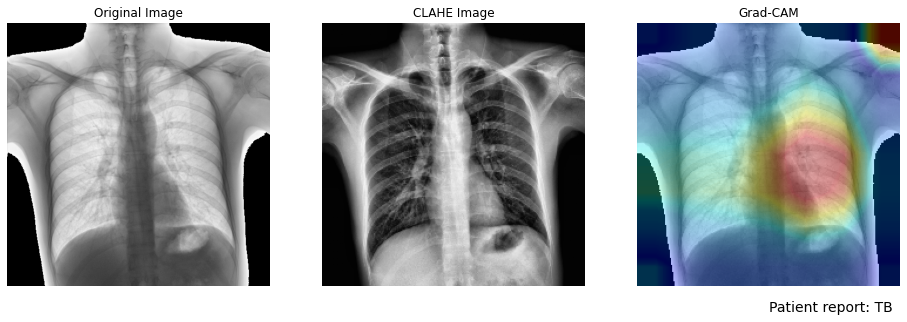

In [76]:
# Show the original image and the overlayed image
plt.figure(figsize=(16, 16))
plt.subplot(1, 3, 1)
plt.imshow(np.uint8(255*oimg))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(kimg)
plt.title('CLAHE Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(overlayed_img)
plt.title('Grad-CAM')
plt.axis('off')
plt.text(0.5, -0.1, "Patient report: "+str(label), ha='left', fontsize=14, transform=plt.gca().transAxes)
plt.show()